Another code

Dataset loaded successfully.

Shape of the DataFrame: (29531, 16)

Missing Values per column:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


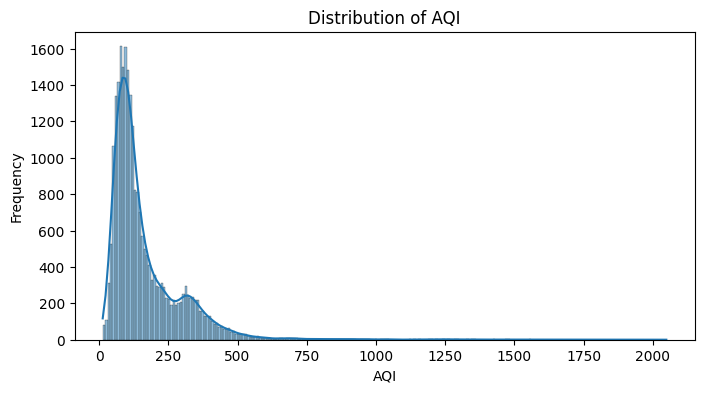

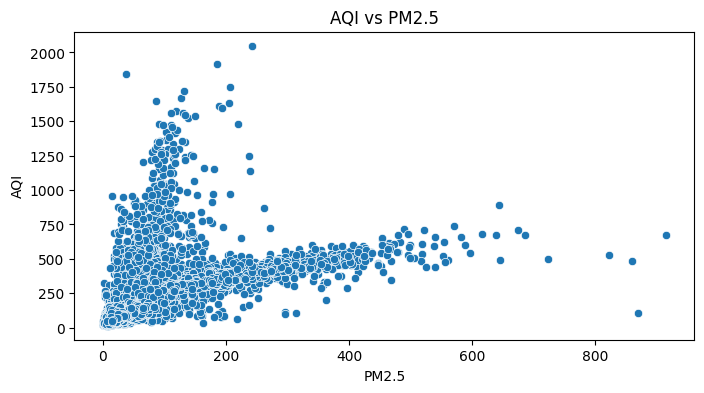

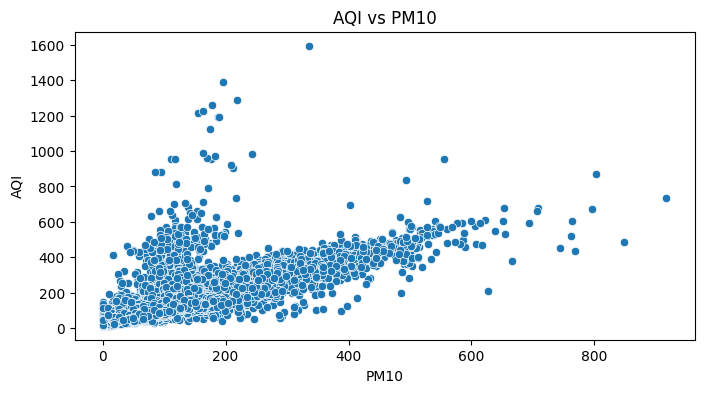

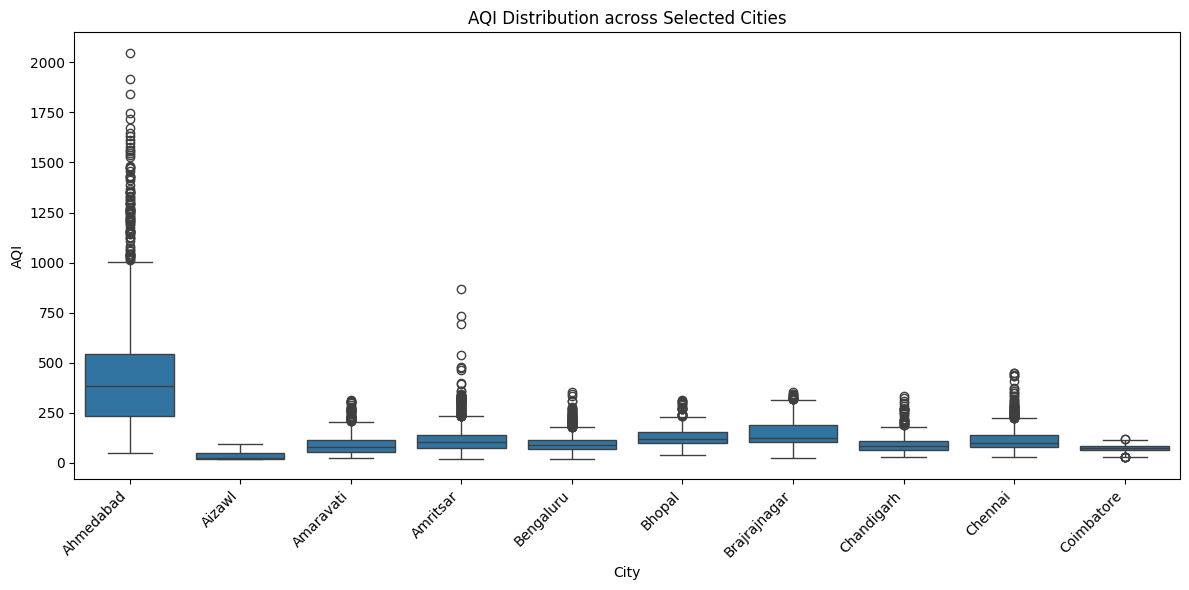


Missing values after imputation:
 City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
        City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  118.0   Moderate  
1  24.55   34.06     3.68     5.50    3.77  118.0   Moderate  
2  29.07   30.70     6.80    16.40    2.25  

<ipython-input-7-f4804ab3ba05>:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_city_day[col].fillna(median_val, inplace=True)
<ipython-input-7-f4804ab3ba05>:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:

import pandas as pd

df_city_day = pd.read_csv('city_day.csv')
print("Dataset loaded successfully.")


import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview
print("\nShape of the DataFrame:", df_city_day.shape)
print("\nMissing Values per column:\n", df_city_day.isnull().sum())

# Basic Visualizations

# Distribution of AQI
plt.figure(figsize=(8, 4))
sns.histplot(df_city_day['AQI'], kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# Relationship between PM2.5 and AQI (Scatter plot)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='PM2.5', y='AQI', data=df_city_day)
plt.title('AQI vs PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

# Relationship between PM10 and AQI (Scatter plot)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='PM10', y='AQI', data=df_city_day)
plt.title('AQI vs PM10')
plt.xlabel('PM10')
plt.ylabel('AQI')
plt.show()


cities_to_plot = df_city_day['City'].unique()[:10]
df_subset = df_city_day[df_city_day['City'].isin(cities_to_plot)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='AQI', data=df_subset)
plt.xticks(rotation=45, ha='right')
plt.title('AQI Distribution across Selected Cities')
plt.xlabel('City')
plt.ylabel('AQI')
plt.tight_layout()
plt.show()


numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    median_val = df_city_day[col].median()
    df_city_day[col].fillna(median_val, inplace=True)

# Impute AQI_Bucket with the mode
mode_val = df_city_day['AQI_Bucket'].mode()[0]
df_city_day['AQI_Bucket'].fillna(mode_val, inplace=True)

print("\nMissing values after imputation:\n", df_city_day.isnull().sum())
print(df_city_day.head())


# Define target variable and features
target = 'AQI'
features = [col for col in numerical_cols if col != 'AQI']

X = df_city_day[features]
y = df_city_day[target]

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")